In [1]:
import pandas as pd
import numpy as np

In [2]:
# Cargo los datos
df = pd.read_csv('data/data_playlist.csv')

In [3]:
df.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


Descripción del dataset
---

- **`id`**: A unique identifier for each track.
- **`name`**: The track's title.
- **`artists`**: Artist/s who participated in the track.
- **`duration_ms`**: Length of the track in milliseconds (ms).
- **`release_date`**: The track's release date in MM/DD/YYYY, or at the minimum, YYYY.
- **`year`**: The year in which the track was released.
- **`acousticness`***: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- **`danceability`***: Describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.
- **`energy`***: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast and loud.
- **`instrumentalness`***: Predicts whether a track contains no vocals.
- **`liveness`***: Detects the presence of an audience in the recording.
- **`loudness`***: The overall loudness of a track in decibels (dB).
- **`speechiness`***: Detects the presence of spoken words in a track.
- **`tempo`***: The overall estimated tempo of a track in beats per minute (BPM).
- **`valence`***: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
- **`mode`**: Melodic content from the modality of a track. 1 = Major; 0 = Minor.
- **`key`**: The estimated overall key of a track from the [Pitch Class notation](
https://en.wikipedia.org/wiki/Pitch_class
). E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
- **`popularity`**: A track's popularity, 0-100 where 100 is the most popular based on [Spotify's algorithm](
https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/
).
- **`explicit`**: Whether or not the track has explicit lyrics. 1 = True; 0 = False. 

ChatGpt4
---
Claro, a continuación te proporciono una descripción general de las columnas más comunes que podrías encontrar en un conjunto de datos de Spotify:

1. **Duration_ms**: La duración de la canción en milisegundos.

2. **Danceability**: Una medida que describe cuánto se presta una canción para bailar, basada en varios factores musicales. Los valores varían de 0.0 a 1.0.

3. **Energy**: Una medida que representa la intensidad y actividad de una canción. Los valores varían de 0.0 a 1.0.

4. **Key**: La clave tonal predominante de la canción, representada como un valor entero entre 0 y 11 (donde cada número corresponde a una clave musical).

5. **Loudness**: El volumen general de la canción en decibelios (dB).

6. **Mode**: Indica la modalidad de la canción (mayor o menor), representada como un valor binario (1 = Mayor, 0 = Menor).

7. **Speechiness**: Una medida que representa la presencia de palabras habladas en una canción. Los valores varían de 0.0 a 1.0.

8. **Acousticness**: Una medida que representa la cantidad de sonido acústico en una canción. Los valores varían de 0.0 a 1.0.

9. **Instrumentalness**: Como mencioné anteriormente, es una medida que predice si una pista es instrumental o no. Los valores varían de 0.0 a 1.0.

10. **Liveness**: Una medida que representa la presencia de una audiencia en la grabación de la canción. Los valores varían de 0.0 a 1.0.

11. **Valence**: Una medida que representa la positividad transmitida por una canción. Los valores varían de 0.0 a 1.0.

12. **Tempo**: El tempo general de la canción en latidos por minuto (BPM).

13. **Time_Signature**: Una indicación general del número de beats en cada barra o compás de la canción.

14. **label**: objetivo

Es posible que algunas columnas adicionales estén presentes dependiendo del conjunto de datos específico, pero estas son las más comunes y representativas del análisis musical proporcionado por Spotify.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


In [5]:
df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


In [21]:
df['mode'].mode()

0    1
Name: mode, dtype: int64

In [22]:
df['key'].mode()

0    0
Name: key, dtype: int64

In [23]:
df['time_signature'].unique()

array([4, 3, 5, 1], dtype=int64)

In [12]:
np.sort(df.key.unique())


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [15]:
df['mode'].unique()

array([0, 1], dtype=int64)

In [13]:
# Miro los valores nulos
df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

In [16]:
import seaborn as sns

c:\Users\jocef\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


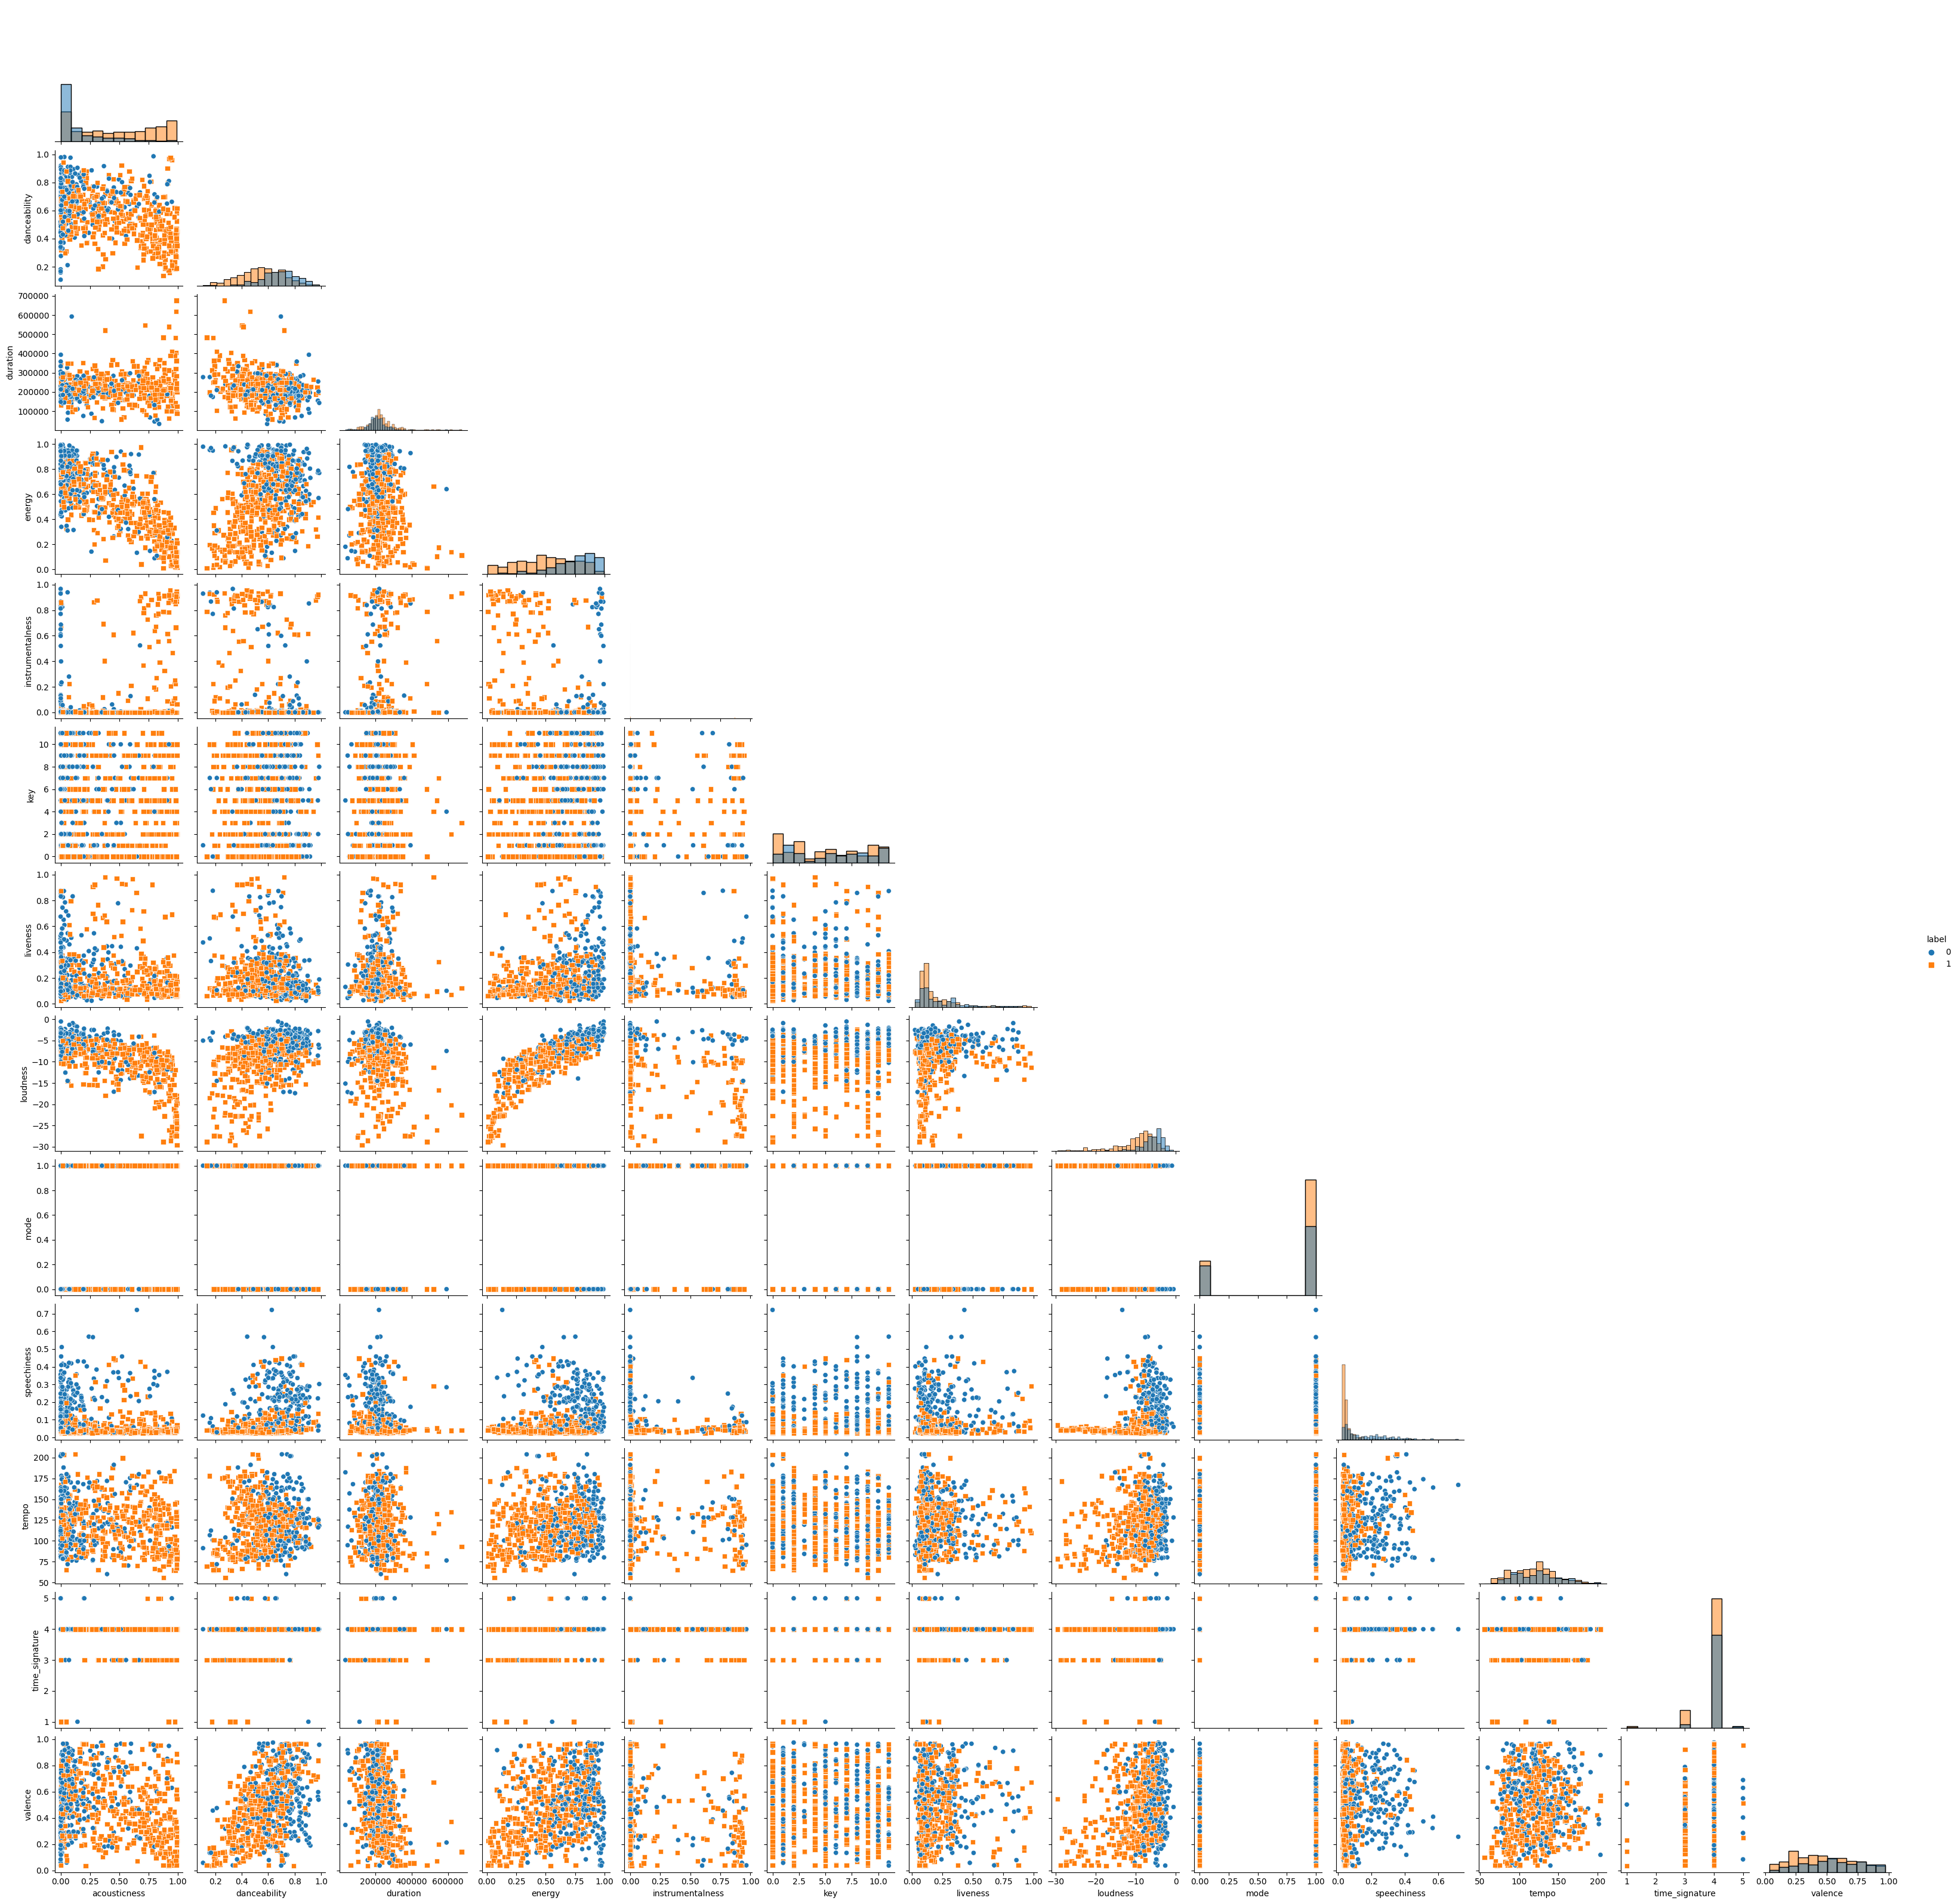

In [24]:
sns.pairplot(df, hue="label", diag_kind="hist", corner=True, markers=["o", "s"])

c:\Users\jocef\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


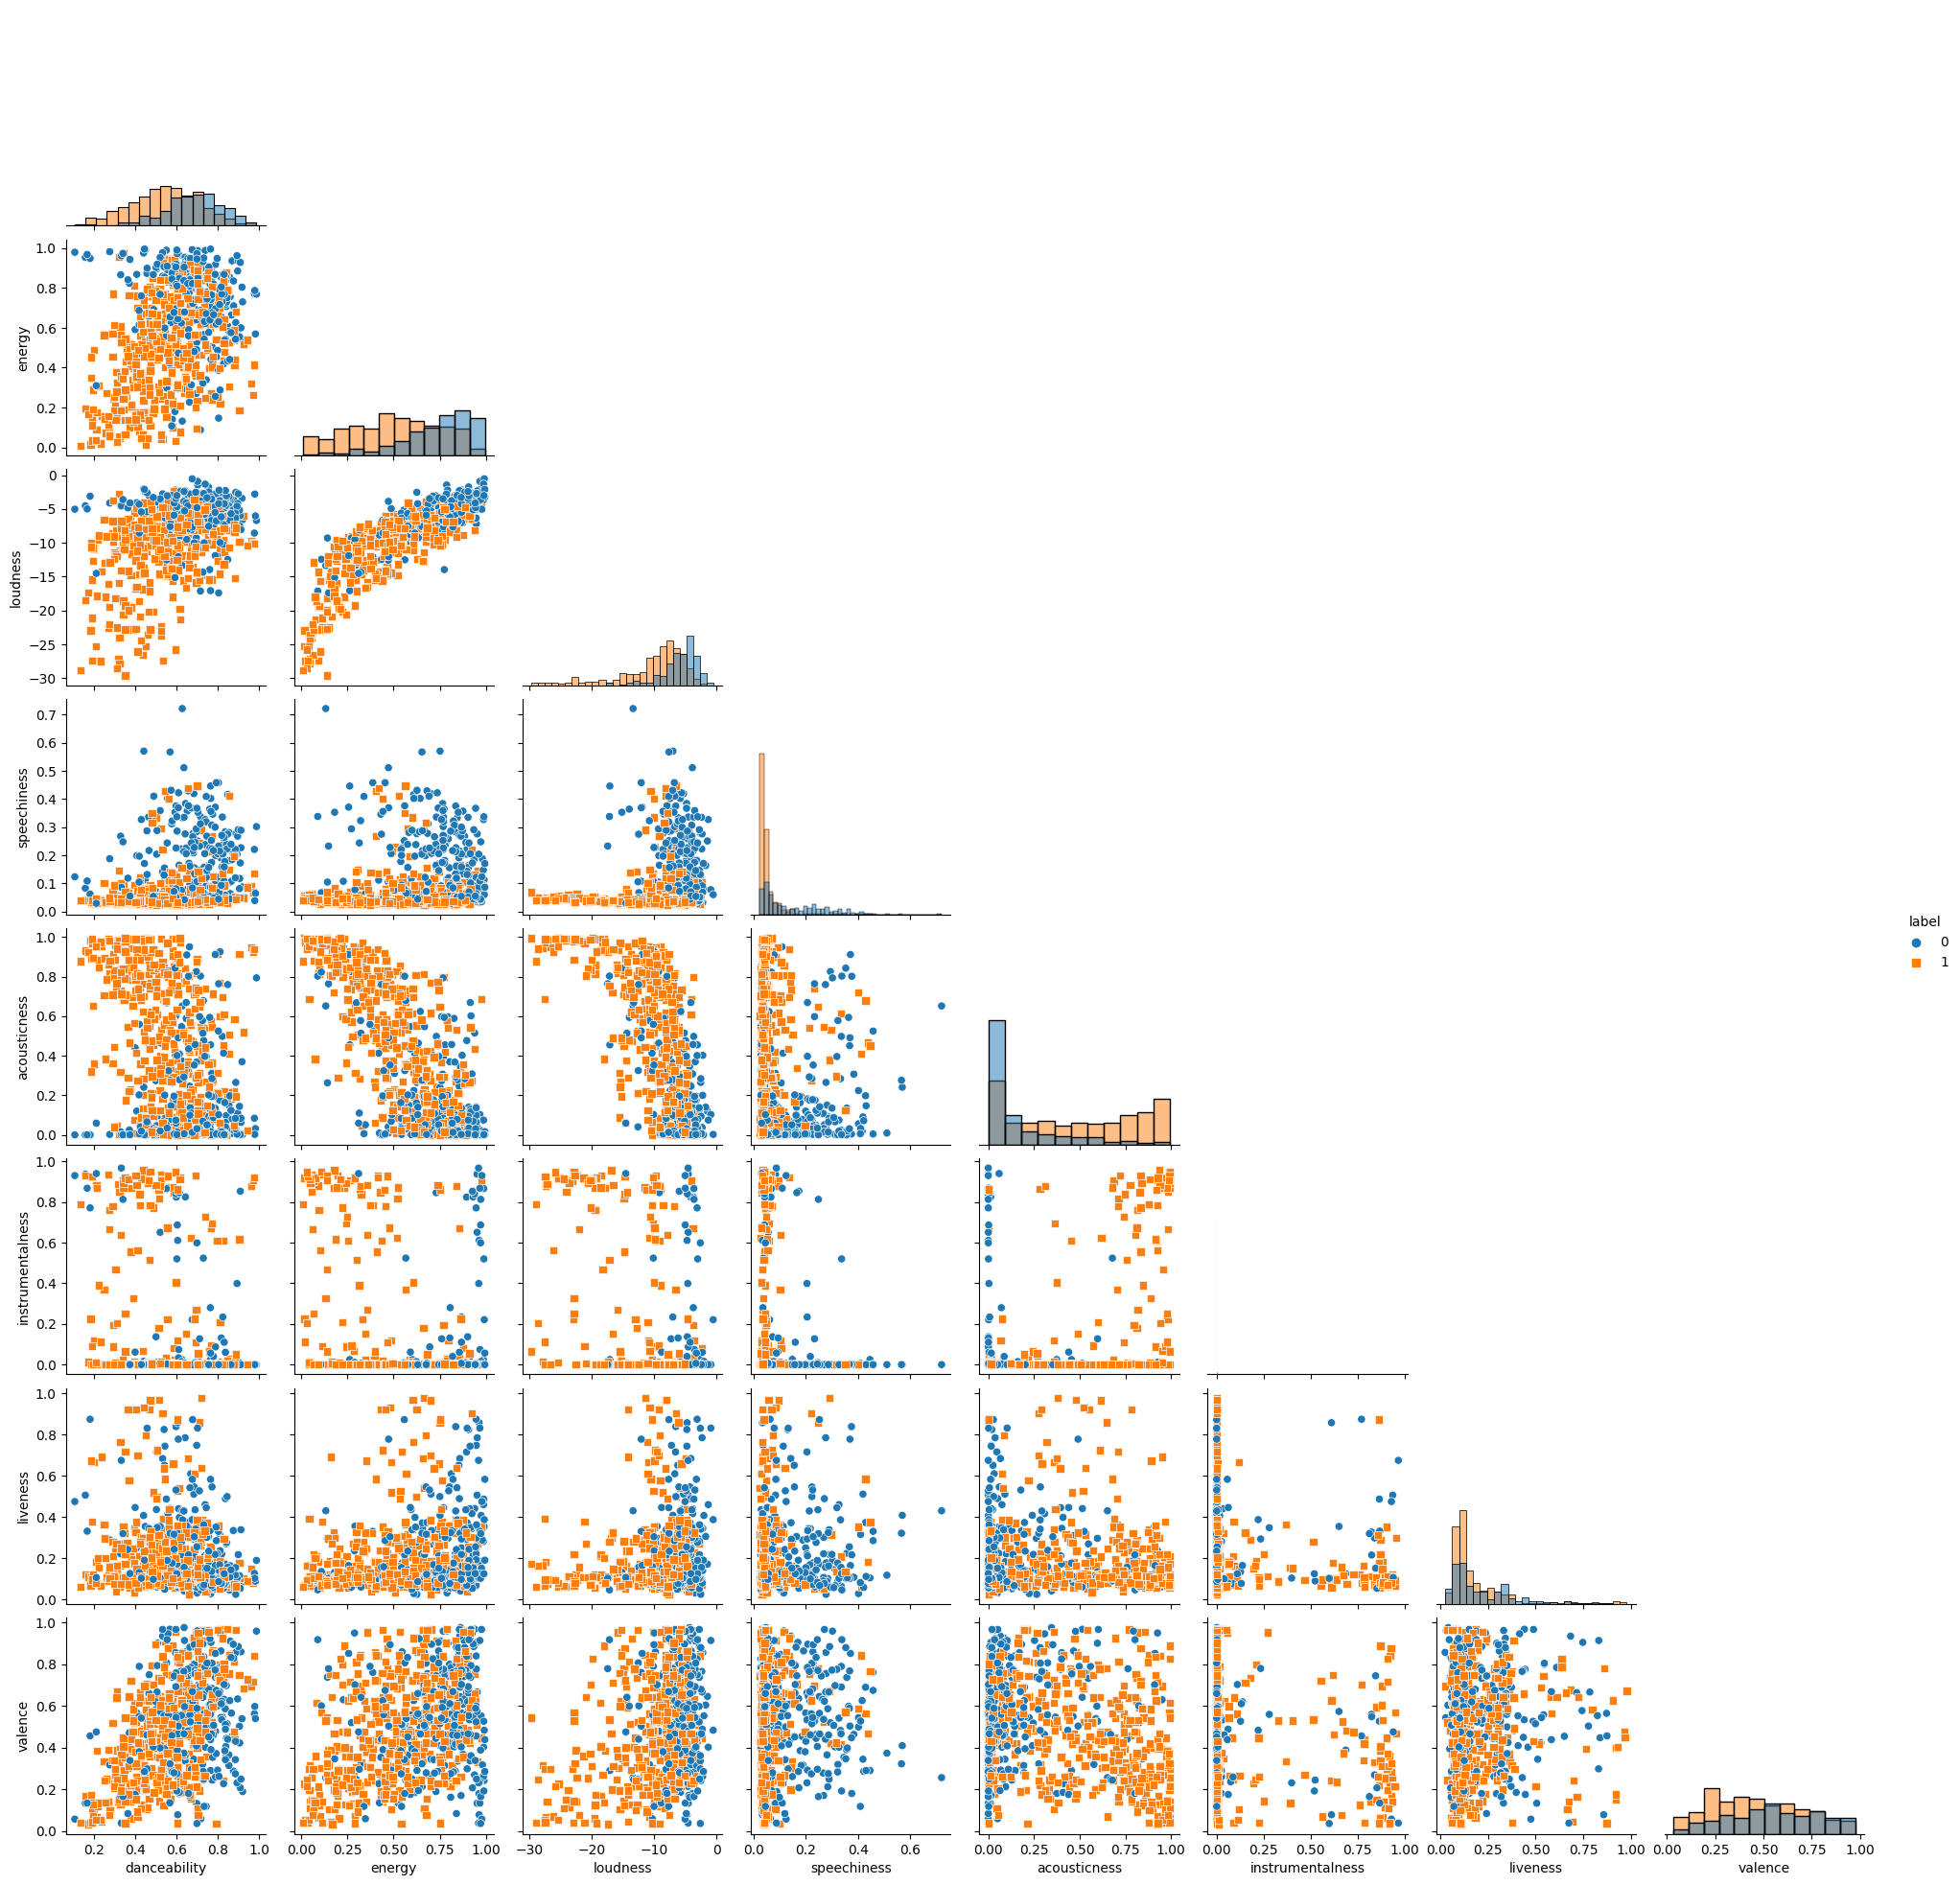

In [25]:
sns.pairplot(df, hue="label", diag_kind="hist", corner=True, markers=["o", "s"], vars=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'])

<Axes: >

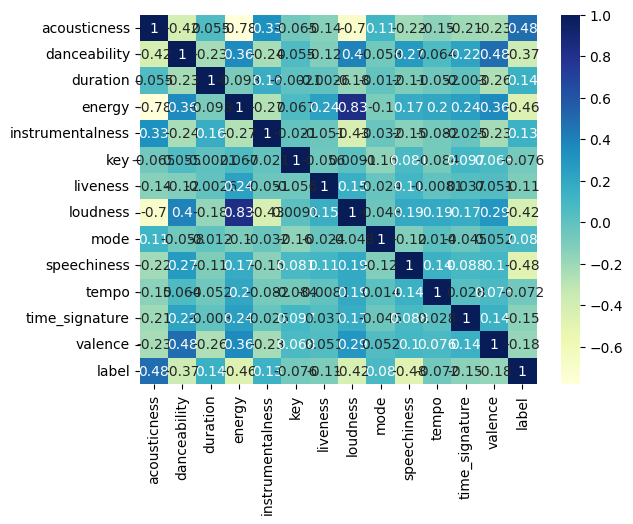

In [26]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 

<Axes: >

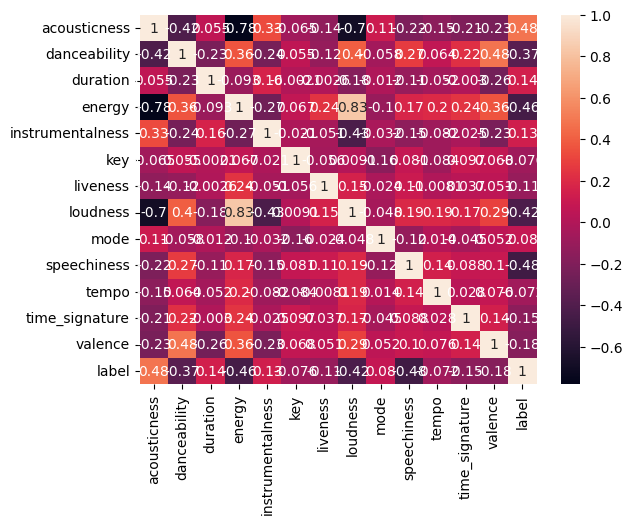

In [27]:
sns.heatmap(df.corr(), annot=True, fontsize=10) 
# cambiar fontsize con: sns.heatmap(df.corr(), annot=True, fontsize=10)
